In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [14]:
residuals_path = "peer/residuals.csv"
unnormalized_rpkm_path = "unnormalized_rpkm_processed.csv.gz"
normalized_rpkm_path = "/data/yosef3/scratch/ruchir/data/geuvadis/analysis_results/GD462.GeneQuantRPKM.50FN.samplename.resk10.txt.gz"

In [15]:
residuals_df = pd.read_csv(residuals_path, index_col=0)  # [genes, samples]
unnormalized_rpkm_df = pd.read_csv(
    unnormalized_rpkm_path, index_col=0
)  # [genes, 3 + samples]
normalized_rpkm_df = pd.read_csv(
    normalized_rpkm_path, sep="\t", index_col=0
)  # [genes, 3 + samples]

In [16]:
assert residuals_df.shape == (
    unnormalized_rpkm_df.shape[0],
    unnormalized_rpkm_df.shape[1] - 3,
)
residuals_df.index = unnormalized_rpkm_df.index
residuals_df.columns = unnormalized_rpkm_df.columns[3:]

In [17]:
residuals_df.head()

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
TargetID,,,,,,,,,,,,,,,,,,,,,
ENSG00000257527.1,0.341114,0.281433,0.027909,-0.133982,0.897500,0.319100,-0.157008,-0.228155,0.264038,0.113185,...,0.096045,0.545855,0.294637,0.015524,-0.342832,-0.417957,0.237867,-0.049840,-0.004612,-0.147046
ENSG00000151503.7,-3.835394,-3.161701,2.804922,4.273174,-2.991833,-4.314854,4.701580,3.963957,-17.229130,-1.101347,...,-8.300020,4.544962,10.548103,7.167358,2.244968,7.147945,6.088387,-12.374606,10.412142,7.149536
ENSG00000254681.2,-1.298882,1.085759,-1.511616,-0.893597,1.225505,-0.380849,-3.372296,-0.523839,-1.356159,-3.335026,...,-2.022302,-1.223028,-3.239114,2.661951,-1.997034,-3.118671,-5.090214,-2.532000,0.813943,-1.979062
ENSG00000228477.1,5.485413,-23.140442,67.697952,113.478561,-8.078278,-93.704842,-29.693451,13.777664,-19.212189,-10.233826,...,-22.464935,31.718460,17.058807,109.523117,-52.931679,51.438751,11.567459,-33.214554,6.821579,-105.096390
ENSG00000159733.9,-0.495700,-0.451940,-0.055596,-0.359744,-0.190955,-0.225917,-0.170231,-0.385637,-0.194150,-0.248913,...,-0.102485,-0.388668,-0.021416,0.125535,0.434739,0.275305,0.333793,-0.057786,0.004573,0.031054


In [29]:
def compare_residuals_to_normalized_counts(
    residuals_df: pd.DataFrame,
    normalized_rpkm_df: pd.DataFrame,
    sample: str,
):
    assert set(residuals_df.index) == set(normalized_rpkm_df.index)
    residual_counts = []
    normalized_counts = []
    for g in residuals_df.index:
        residual_counts.append(residuals_df.loc[g, sample])
        normalized_counts.append(normalized_rpkm_df.loc[g, sample])
    pearson = pearsonr(residual_counts, normalized_counts)[0]
    spearman = spearmanr(residual_counts, normalized_counts)[0]
    ax = sns.scatterplot(
        x=residual_counts,
        y=normalized_counts,
    )
    ax.set(
        xlabel="Residual",
        ylabel="Normalized counts",
        title=f"{sample}: Pearson={pearson:.3f}, Spearman={spearman:.3f}",
    )
    ax.set_xlim(-100, 100)
    ax.set_ylim(-100, 100)

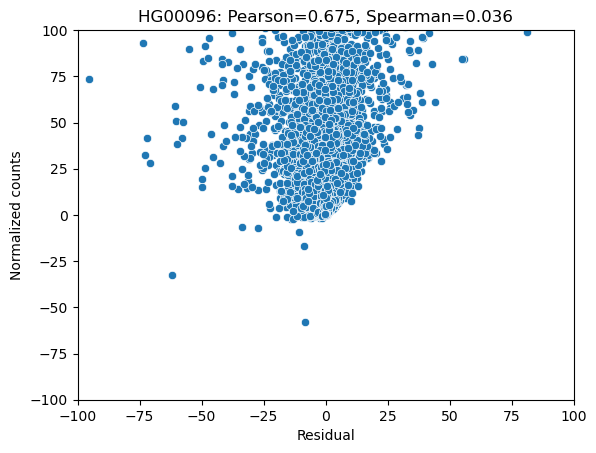

In [30]:
compare_residuals_to_normalized_counts(
    residuals_df,
    normalized_rpkm_df,
    "HG00096",
)

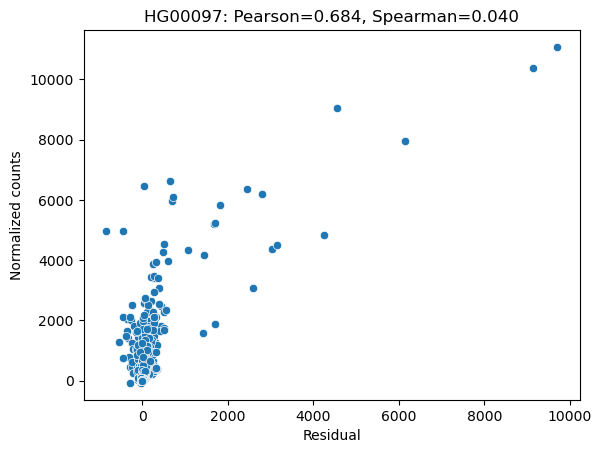

In [20]:
compare_residuals_to_normalized_counts(
    residuals_df,
    normalized_rpkm_df,
    "HG00097",
)

In [22]:
factors_df = pd.read_csv("peer/factors.csv", index_col=0)
print(factors_df.shape)
factors_df.head()

(462, 11)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1,1,-0.001381,-0.001387,-0.004187,0.001838,-0.000192,-0.006101,-0.004593,0.011263,0.000269,-0.001131
2,1,-0.001700,-0.001245,-0.003887,0.001910,-0.000821,0.009346,-0.004676,0.005617,-0.000562,-0.001219
3,1,-0.001241,-0.000985,-0.002689,0.001791,-0.001000,-0.006091,-0.002945,0.003992,0.000537,-0.000573
4,1,-0.002005,-0.001180,-0.004472,0.002954,-0.001156,0.003087,-0.005392,0.000753,-0.002072,-0.001367
5,1,-0.001284,-0.002170,-0.003570,0.001902,-0.000740,-0.007706,-0.003863,0.009370,0.002750,-0.001167


In [23]:
weights_df = pd.read_csv("peer/weights.csv", index_col=0)
print(weights_df.shape)
weights_df.head()

(23722, 11)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1,0.010322,164.494446,-306.872437,-61.223301,13.474010,36.149834,1.095383,-0.651802,-22.225048,-5.321684,-120.874153
2,0.000164,-9560.464844,3925.163818,1508.385254,-374.305542,-1722.174072,117.061714,-6568.573242,-387.974365,4045.155273,1018.837402
3,0.000270,30.402163,-1241.503418,-1539.002808,-5147.251465,-1126.431152,17.634863,-2099.390869,-90.073868,497.933350,-1681.326904
4,0.000159,15869.793945,9660.933594,4634.143555,-19792.390625,739.966553,-12.457357,-62593.308594,250.745483,2415.808838,3120.047852
5,-0.006823,-130.736710,87.826950,-91.088806,-357.592102,65.201897,3.075730,-207.694855,9.819803,5.539789,-43.464882


In [24]:
my_residuals = weights_df.to_numpy() @ factors_df.to_numpy().T

In [25]:
my_residuals

array([[ 0.36449568,  0.38553651,  0.23404136, ...,  0.32657966,
         0.54091257,  0.31843602],
       [26.10152241, 32.31327123, 23.66783588, ..., 26.78265596,
        26.49365986, 26.3416323 ],
       [ 9.44065169,  9.81545057,  4.17608649, ...,  8.93742924,
         7.64960694,  4.4310619 ],
       ...,
       [ 0.11120216,  0.10254012,  0.08889751, ...,  0.15258423,
         0.06847646,  0.16995066],
       [ 0.15103922,  0.05704308,  0.17252891, ...,  0.27203931,
         0.15711355,  0.20541682],
       [ 0.22387817,  0.22428806,  0.20304608, ...,  0.4053225 ,
         0.21444773,  0.37806226]])

In [26]:
residuals_df.to_numpy()

array([[ 3.41114312e-01,  2.81433463e-01,  2.79085934e-02, ...,
        -4.98396158e-02, -4.61244583e-03, -1.47046030e-01],
       [-3.83539391e+00, -3.16170120e+00,  2.80492210e+00, ...,
        -1.23746061e+01,  1.04121418e+01,  7.14953613e+00],
       [-1.29888153e+00,  1.08575916e+00, -1.51161647e+00, ...,
        -2.53199959e+00,  8.13942909e-01, -1.97906184e+00],
       ...,
       [ 2.78678387e-02, -3.00116837e-04,  3.42465937e-04, ...,
        -1.07422471e-03,  4.16235402e-02, -1.51205957e-02],
       [-2.18092650e-02,  1.89669132e-02,  8.33510607e-02, ...,
        -8.05592388e-02, -9.98136103e-02, -7.98468143e-02],
       [-2.02481449e-02, -3.67480367e-02,  7.60839581e-02, ...,
         1.88547522e-01,  8.78223777e-03, -7.36722648e-02]])